# Project 1 – Group 34
## Dataset: Heart Failure Clinical Records
**Source:** [UCI Machine Learning Repository](https://doi.org/10.24432/C5Z89R)
 
> This dataset contains the medical records of 299 patients who experienced heart failure, collected during their follow-up period. Each patient profile includes 13 clinical features.

In [49]:
import numpy as np
import pandas as pd
from scipy.io import loadmat

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

# Plotting style
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.)

Load data set and and split into the standard format(X,y),
Explanation of the data set:

$y$ is the target variable: **DEATH_EVENT** (binary indicator of patient death)

### Feature Description
| Feature                   | Type       | Description                                               | Unit                | Missing Values |
|---------------------------|------------|-----------------------------------------------------------|---------------------|---------------|
| age                       | Integer    | Age of the patient                                        | years               | no            |
| anaemia                   | Binary     | Decrease of red blood cells or hemoglobin                 | —                   | no            |
| creatinine_phosphokinase  | Integer    | Level of the CPK enzyme in the blood                      | mcg/L               | no            |
| diabetes                  | Binary     | If the patient has diabetes                               | —                   | no            |
| ejection_fraction         | Integer    | Percentage of blood leaving the heart at each contraction | %                   | no            |
| high_blood_pressure       | Binary     | If the patient has hypertension                           | —                   | no            |
| platelets                 | Continuous | Platelets in the blood                                    | kiloplatelets/mL    | no            |
| serum_creatinine          | Continuous | Level of serum creatinine in the blood                    | mg/dL               | no            |
| serum_sodium              | Integer    | Level of serum sodium in the blood                        | mEq/L               | no            |
| sex                       | Binary     | Sex (woman or man)                                        | —                   | no            |
| smoking                   | Binary     | If the patient smokes or not                              | —                   | no            |
| time                      | Integer    | Follow-up period                                          | days                | no            |
| death_event               | Binary     | If the patient died during the follow-up period           | —                   | no            |

In [50]:
df = pd.read_csv('../02452_Group34_Project1/data/heart_failure_clinical_records_dataset.csv')

X = df.drop(columns=['DEATH_EVENT'])         # Features without target
y = pd.Categorical(df['DEATH_EVENT'])        # Target as categorical

# Check the shape of the data
N, M = X.shape
assert N == 299, "There should be 299 samples in the Heart Failure dataset."
assert M == 12, "There should be 12 features in the Heart Failure dataset(13 together - target)"

# Display the first few rows of the dataframe
display(X.head())
display(y[:5])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


[1, 1, 1, 1, 1]
Categories (2, int64): [0, 1]

Check for missing vallues and outliers

Missing values per column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


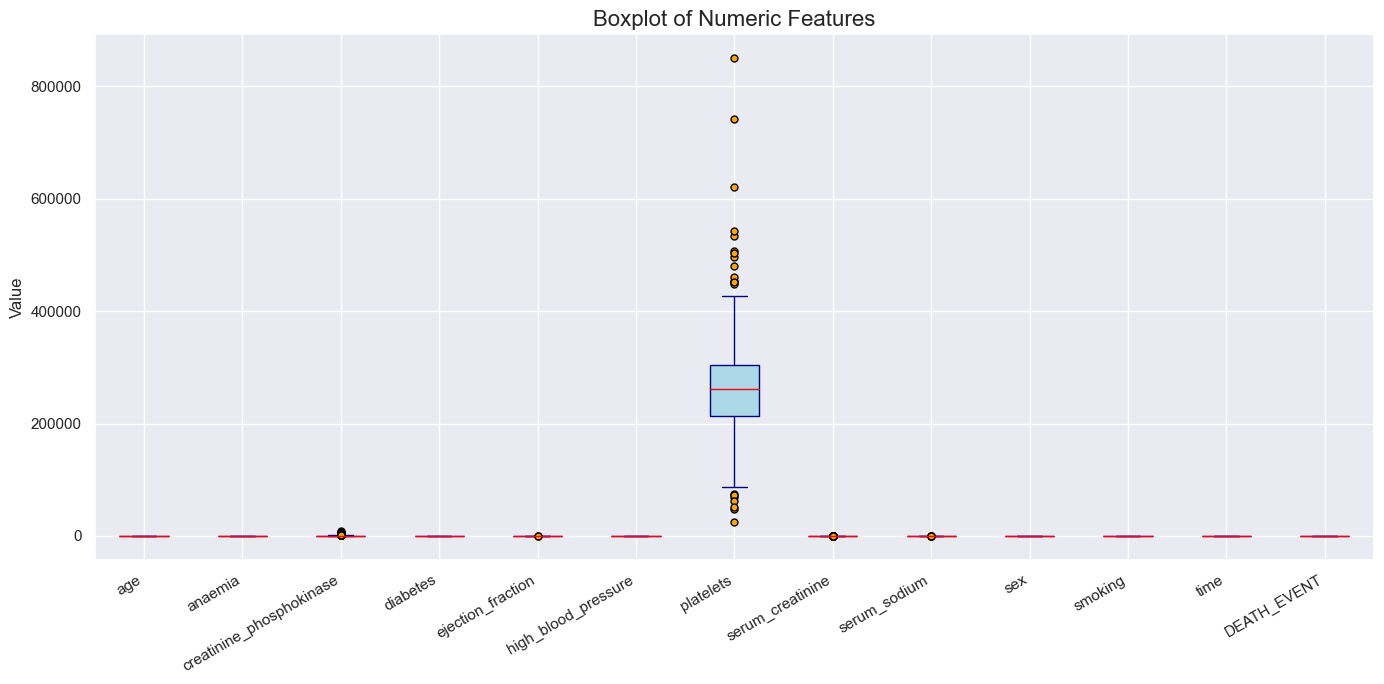

In [51]:
print("Missing values per column:")
print(df.isnull().sum())

plt.figure(figsize=(14,7))
box = df.boxplot(patch_artist=True,
                              boxprops=dict(facecolor='lightblue', color='navy'),
                              medianprops=dict(color='red'),
                              whiskerprops=dict(color='navy'),
                              capprops=dict(color='navy'),
                              flierprops=dict(markerfacecolor='orange', marker='o', markersize=5))
plt.title("Boxplot of Numeric Features", fontsize=16)
plt.ylabel("Value", fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.tight_layout()
plt.show()

We can see there are no missing vallues, but there might be some outliers based on the box plot. We need to do subplots of all to determine that

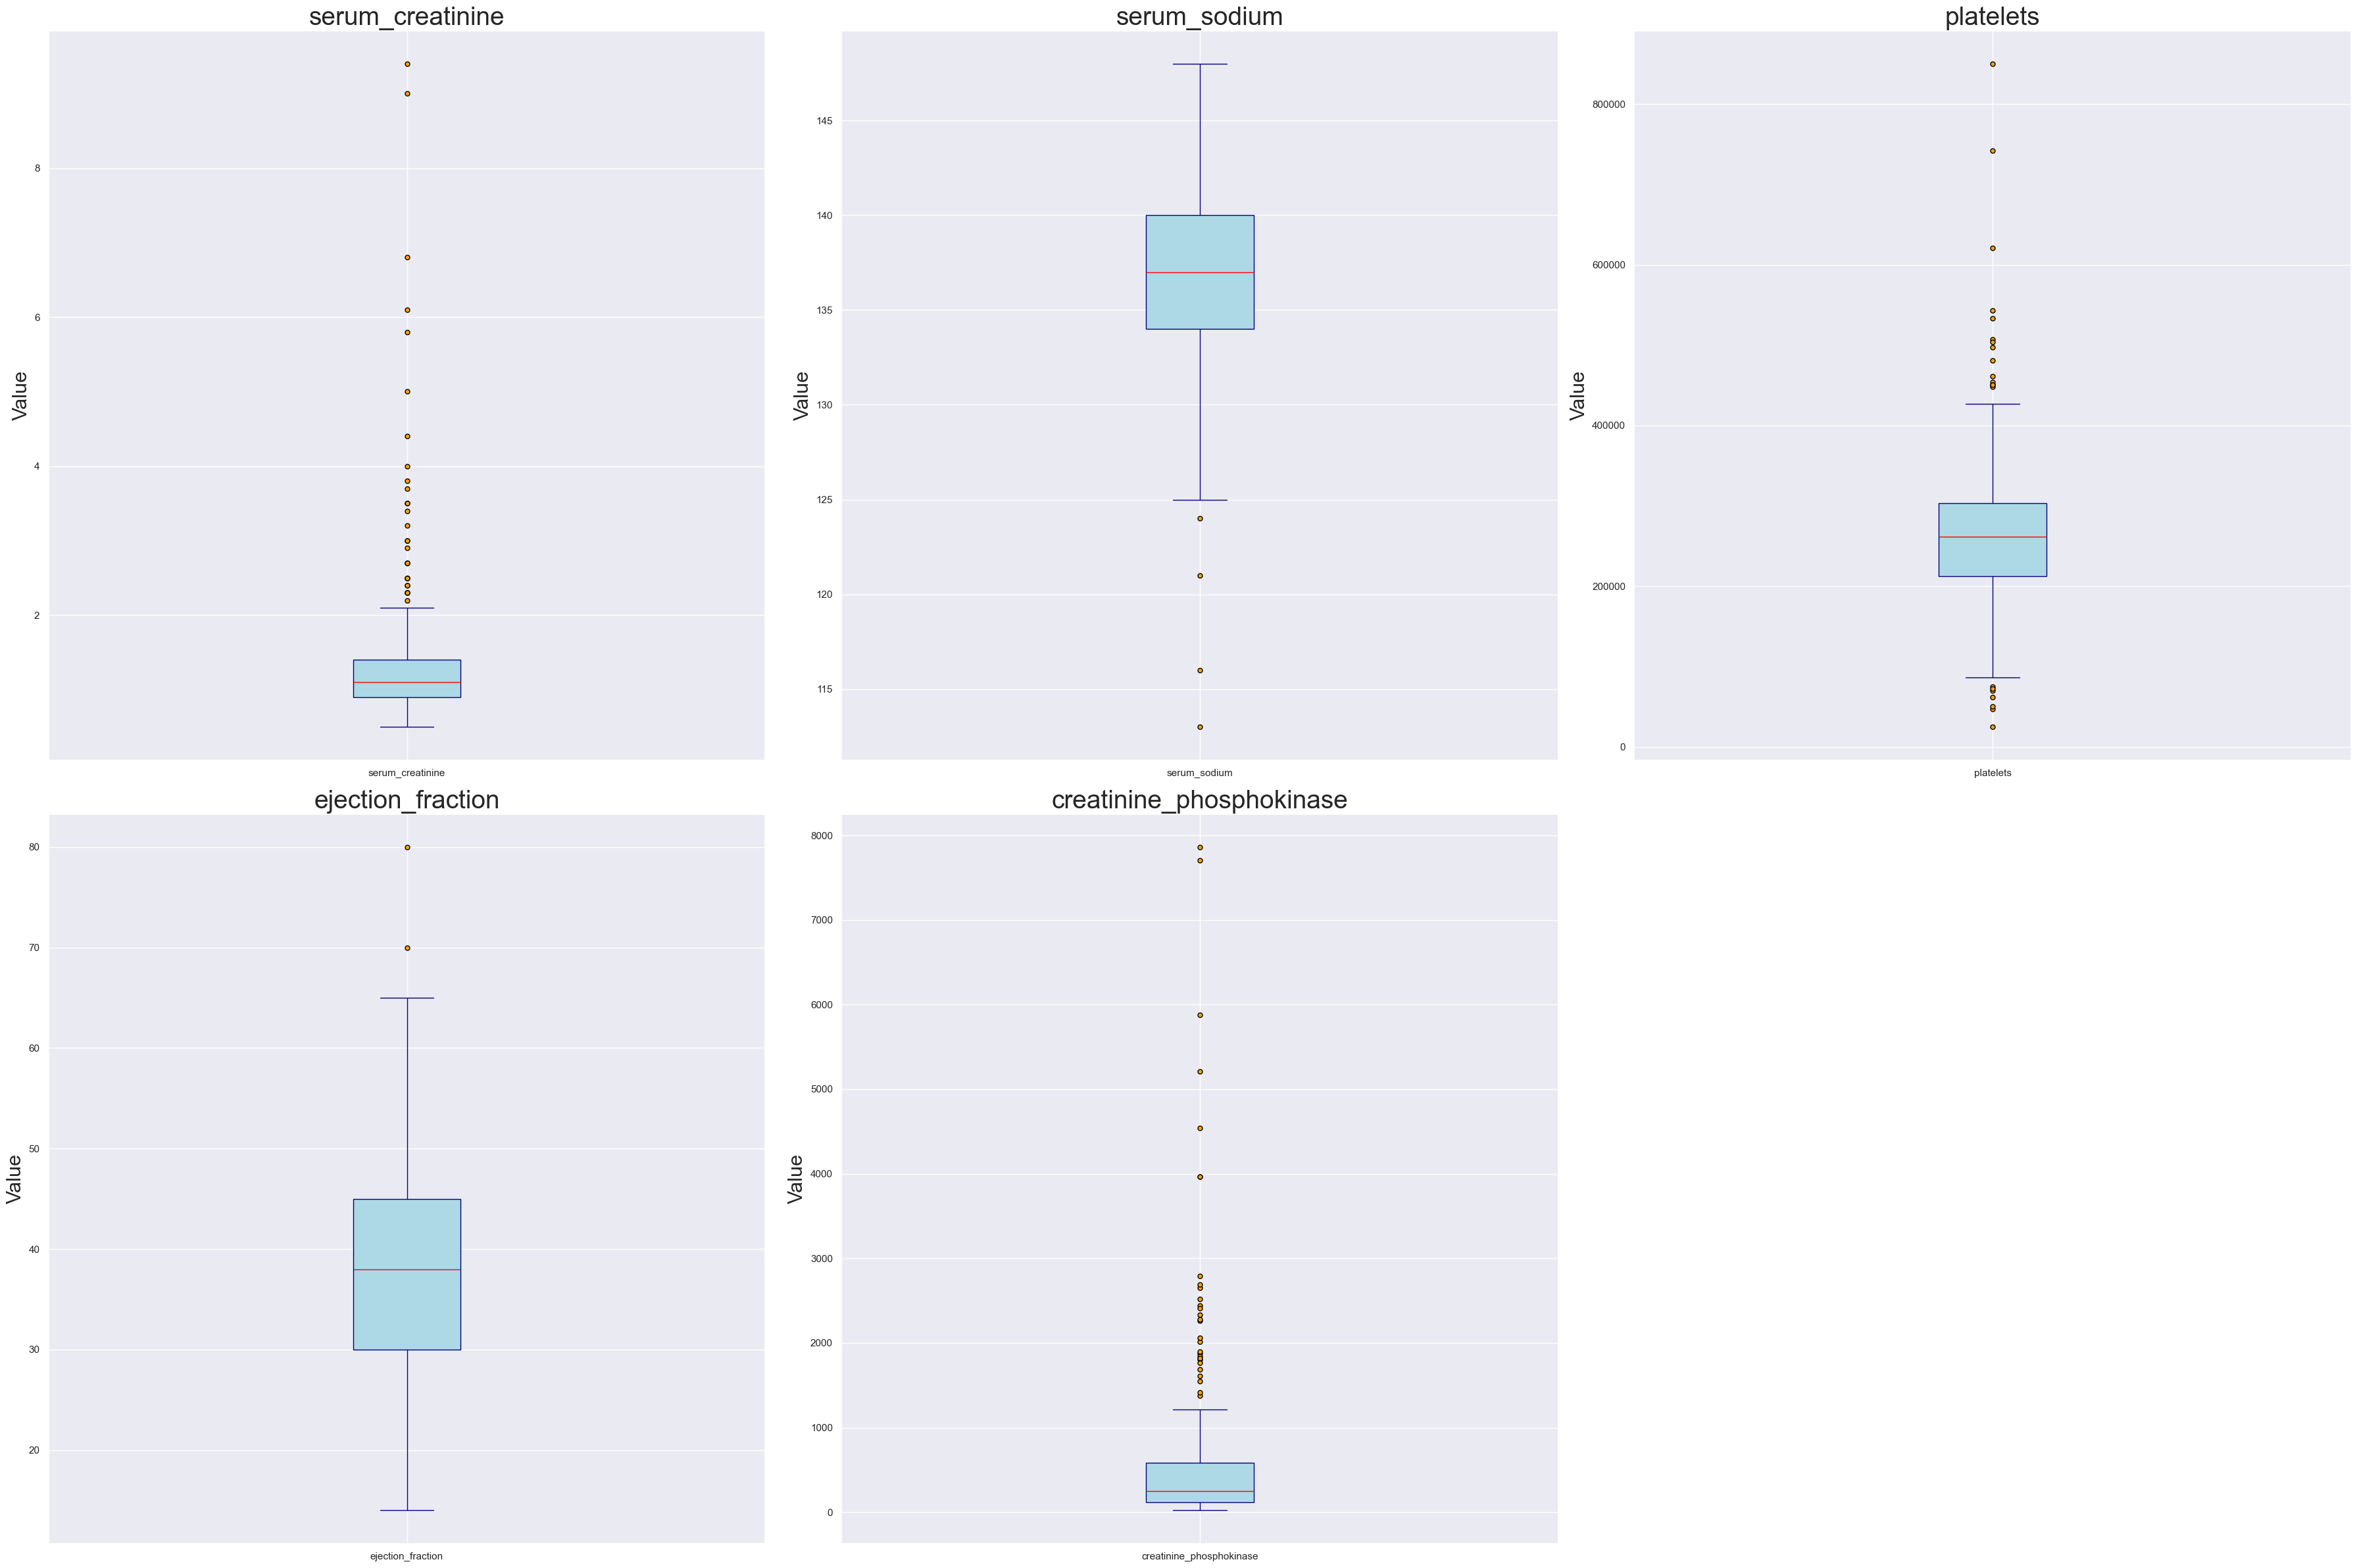

In [52]:
columns_to_show = ['serum_creatinine', 'serum_sodium', 'platelets', 'ejection_fraction', 'creatinine_phosphokinase']
fig, axes = plt.subplots(nrows=2, ncols=int(np.ceil(len(columns_to_show)/2)), figsize=(36, 24))  
axes = axes.flatten()

for i, col in enumerate(columns_to_show):
    df.boxplot(column=col, ax=axes[i], patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='navy'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='navy'),
               capprops=dict(color='navy'),
               flierprops=dict(markerfacecolor='orange', marker='o', markersize=5))
    axes[i].set_title(col, fontsize=28)
    axes[i].set_ylabel("Value", fontsize=22)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

We can see in many of the numeric features there might be outliers fx ejection_fraction we see 2 vallues that are out of the scale for the rest of the values 

In [53]:
# Display summary statistics for all attributes
summary_stats = df.describe(include='all').transpose()
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## PCA

Since our attributes have very different scales (e.g., platelets vs. ejection_fraction), we'll standardize the data before PCA.

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features (X) - exclude target variable
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Display some statistics about standardization
print(f"\nFeature means after standardization (should be ~0):")
print(f"Mean of means: {np.mean(X_standardized, axis=0).mean():.6f}")
print(f"Feature standard deviations after standardization (should be ~1):")
print(f"Mean of stds: {np.std(X_standardized, axis=0).mean():.6f}")


Feature means after standardization (should be ~0):
Mean of means: -0.000000
Feature standard deviations after standardization (should be ~1):
Mean of stds: 1.000000


### 4.1 Principal Component Directions
The principal directions of the considered PCA components. Plot and interpret the
components in terms of the xattributes

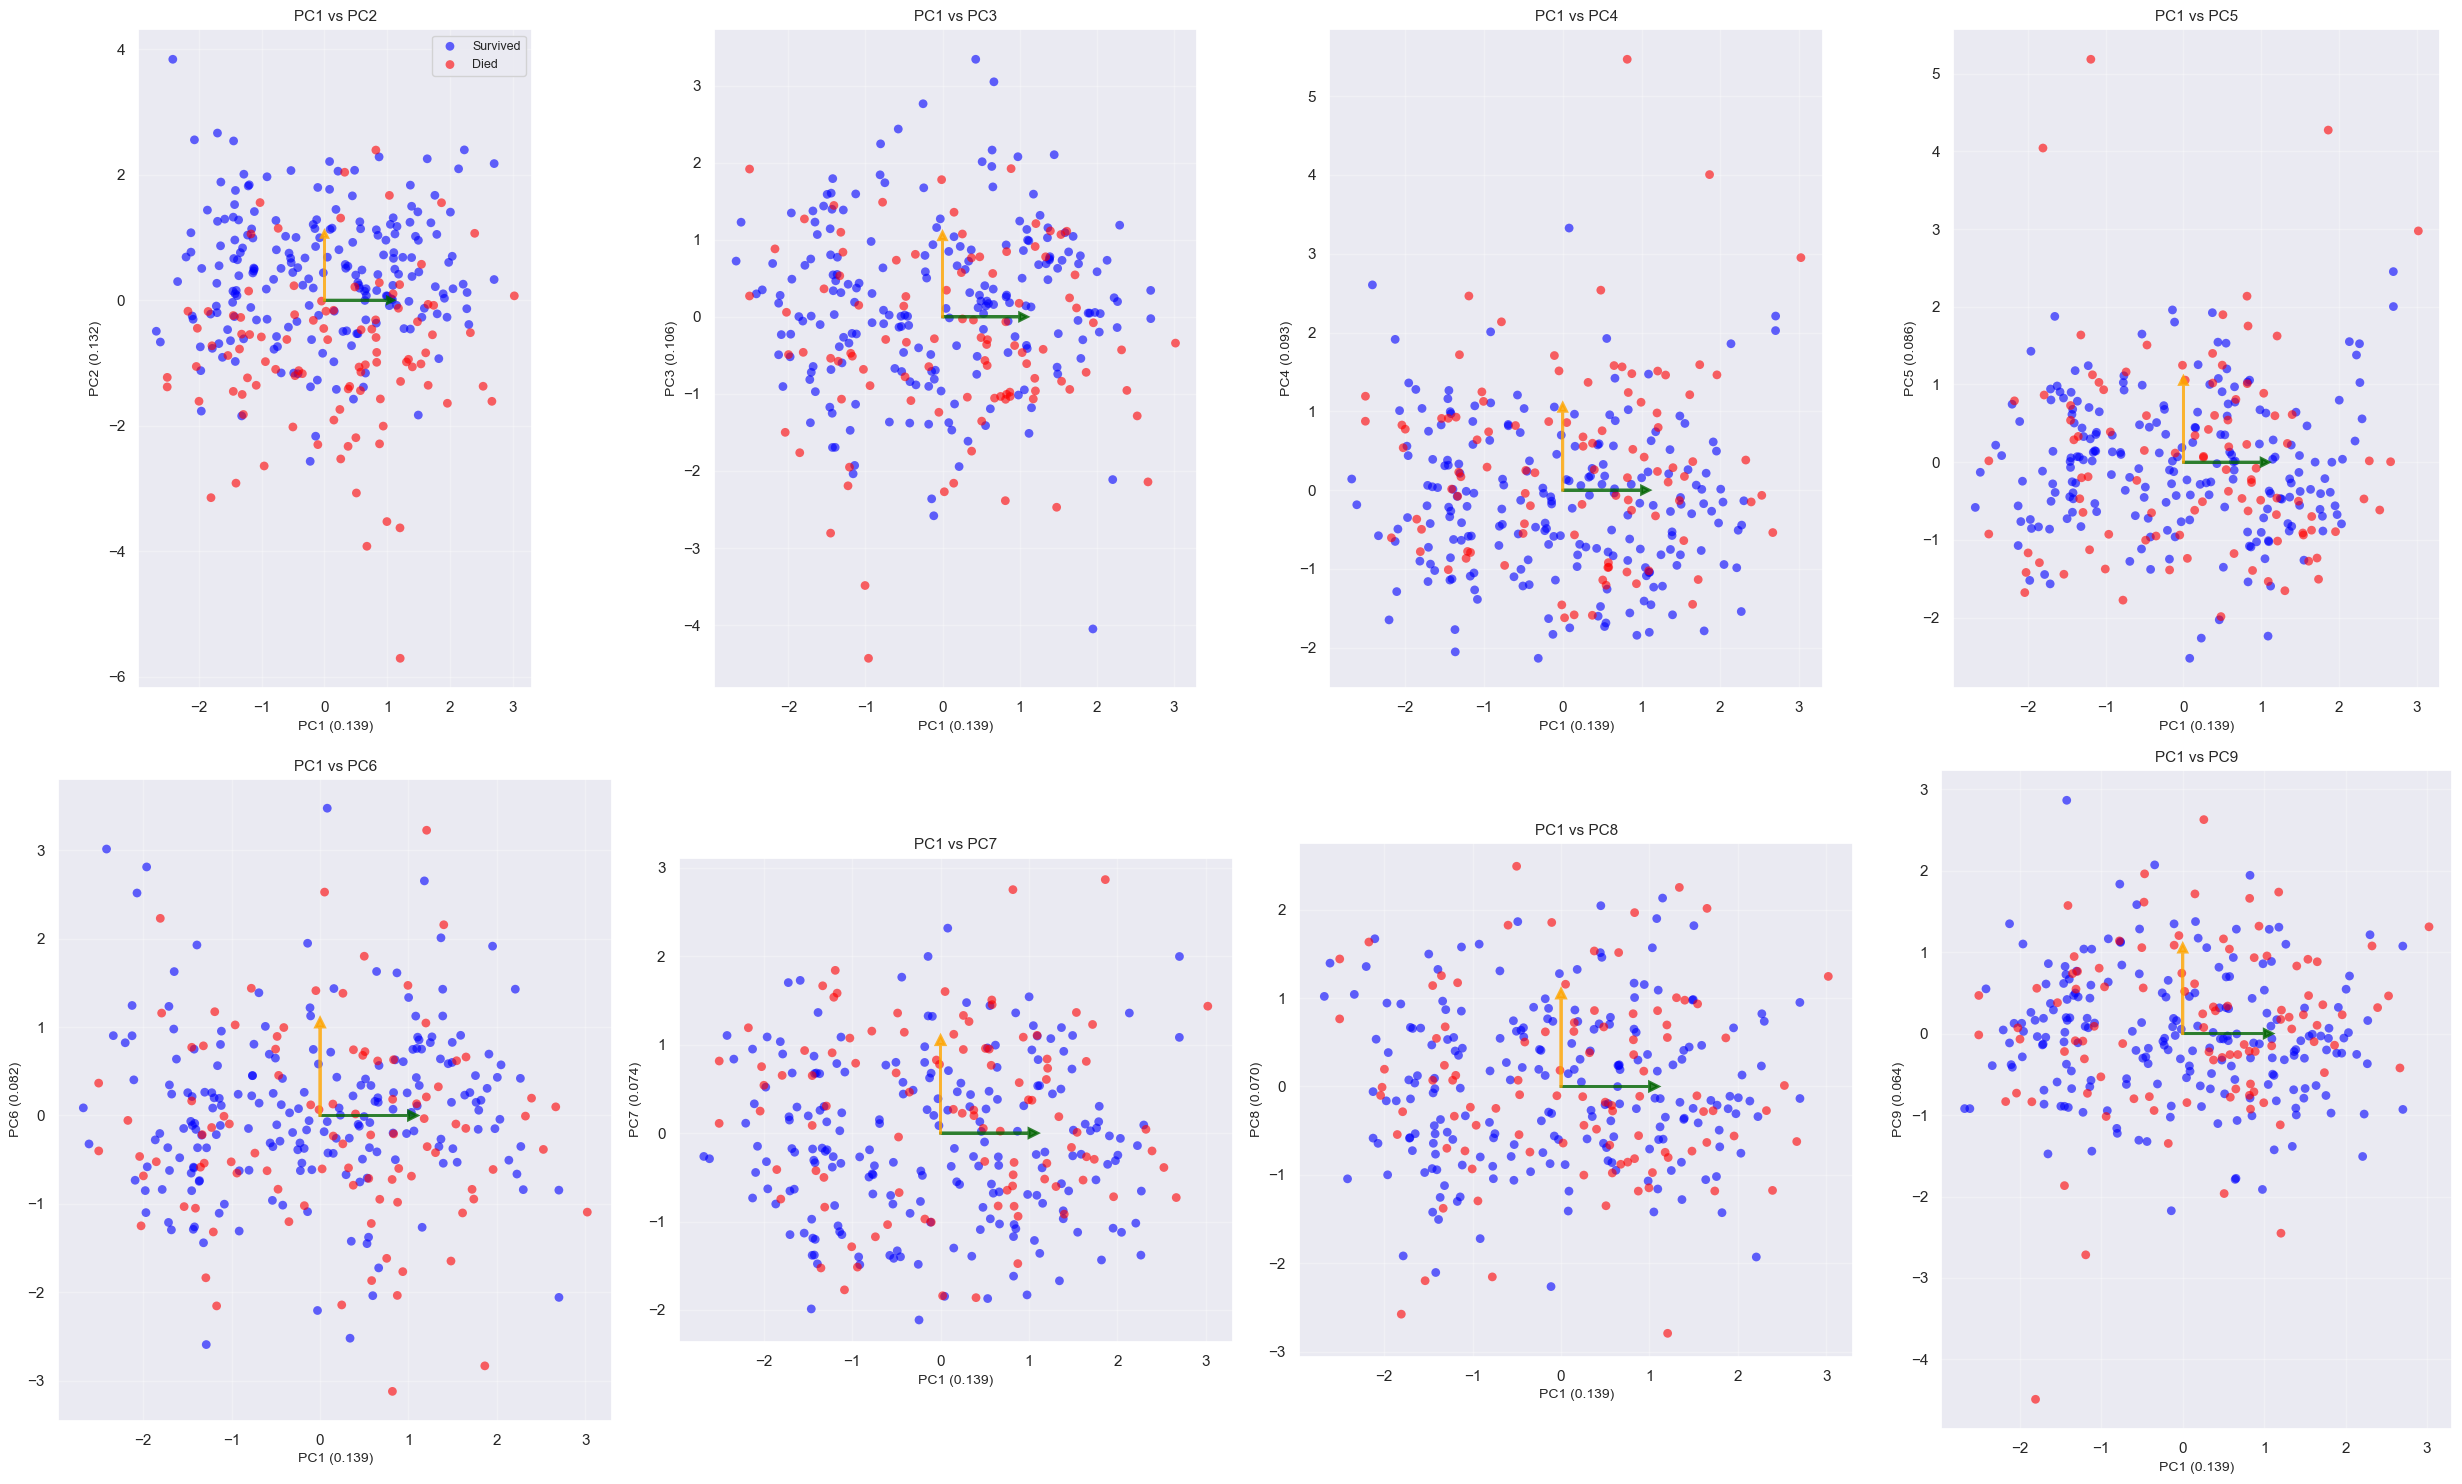

=== PC PROJECTION ANALYSIS ===
Total samples: 299
Survived patients: 203
Died patients: 96

Variance explained by each PC combination:
PC1 vs PC2: 0.270 (27.0%)
PC1 vs PC3: 0.244 (24.4%)
PC1 vs PC4: 0.232 (23.2%)
PC1 vs PC5: 0.224 (22.4%)
PC1 vs PC6: 0.221 (22.1%)
PC1 vs PC7: 0.212 (21.2%)
PC1 vs PC8: 0.209 (20.9%)
PC1 vs PC9: 0.202 (20.2%)


In [80]:
# Create multiple 3D projections for different PC combinations
fig = plt.figure(figsize=(25, 15))

pc_combinations = [
    (0, 1), (0, 2), (0, 3), (0, 4), 
    (0, 5), (0, 6), (0, 7), (0, 8)
]

combination_labels = [
    'PC1 vs PC2', 'PC1 vs PC3', 'PC1 vs PC4', 'PC1 vs PC5',
    'PC1 vs PC6', 'PC1 vs PC7', 'PC1 vs PC8', 'PC1 vs PC9'
]

# Define colors for different death events
colors_death = ['blue', 'red']  # Blue for survived, red for died
target_numeric = df['DEATH_EVENT'].values

# Create subplots (2 rows, 4 columns)
for i, (pc1, pc2) in enumerate(pc_combinations):
    # Create subplot
    ax = fig.add_subplot(2, 4, i+1)
    
    # Plot data points colored by death event
    for death_val in [0, 1]:
        mask = (target_numeric == death_val)
        label = 'Survived' if death_val == 0 else 'Died'
        ax.scatter(X_pca[mask, pc1], X_pca[mask, pc2], 
                  c=colors_death[death_val], alpha=0.6, s=40, 
                  label=label, edgecolors='none')
    
    # Add principal component arrows (basis vectors in projected space)
    # In the projected PC space, the PCs are just the standard basis vectors
    ax.arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1, 
             fc='darkgreen', ec='darkgreen', alpha=0.8, linewidth=2)
    ax.arrow(0, 0, 0, 1, head_width=0.1, head_length=0.1, 
             fc='orange', ec='orange', alpha=0.8, linewidth=2)
    
    # Set labels and title
    ax.set_xlabel(f'PC{pc1+1} ({pca.explained_variance_ratio_[pc1]:.3f})', fontsize=10)
    ax.set_ylabel(f'PC{pc2+1} ({pca.explained_variance_ratio_[pc2]:.3f})', fontsize=10)
    ax.set_title(combination_labels[i], fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    
    # Add legend only to first subplot
    if i == 0:
        ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

# Print summary of projections
print("=== PC PROJECTION ANALYSIS ===")
print(f"Total samples: {len(target_numeric)}")
print(f"Survived patients: {sum(target_numeric == 0)}")
print(f"Died patients: {sum(target_numeric == 1)}")

print("\nVariance explained by each PC combination:")
for i, (pc1, pc2) in enumerate(pc_combinations):
    combined_variance = pca.explained_variance_ratio_[pc1] + pca.explained_variance_ratio_[pc2]
    print(f"{combination_labels[i]}: {combined_variance:.3f} ({combined_variance*100:.1f}%)")

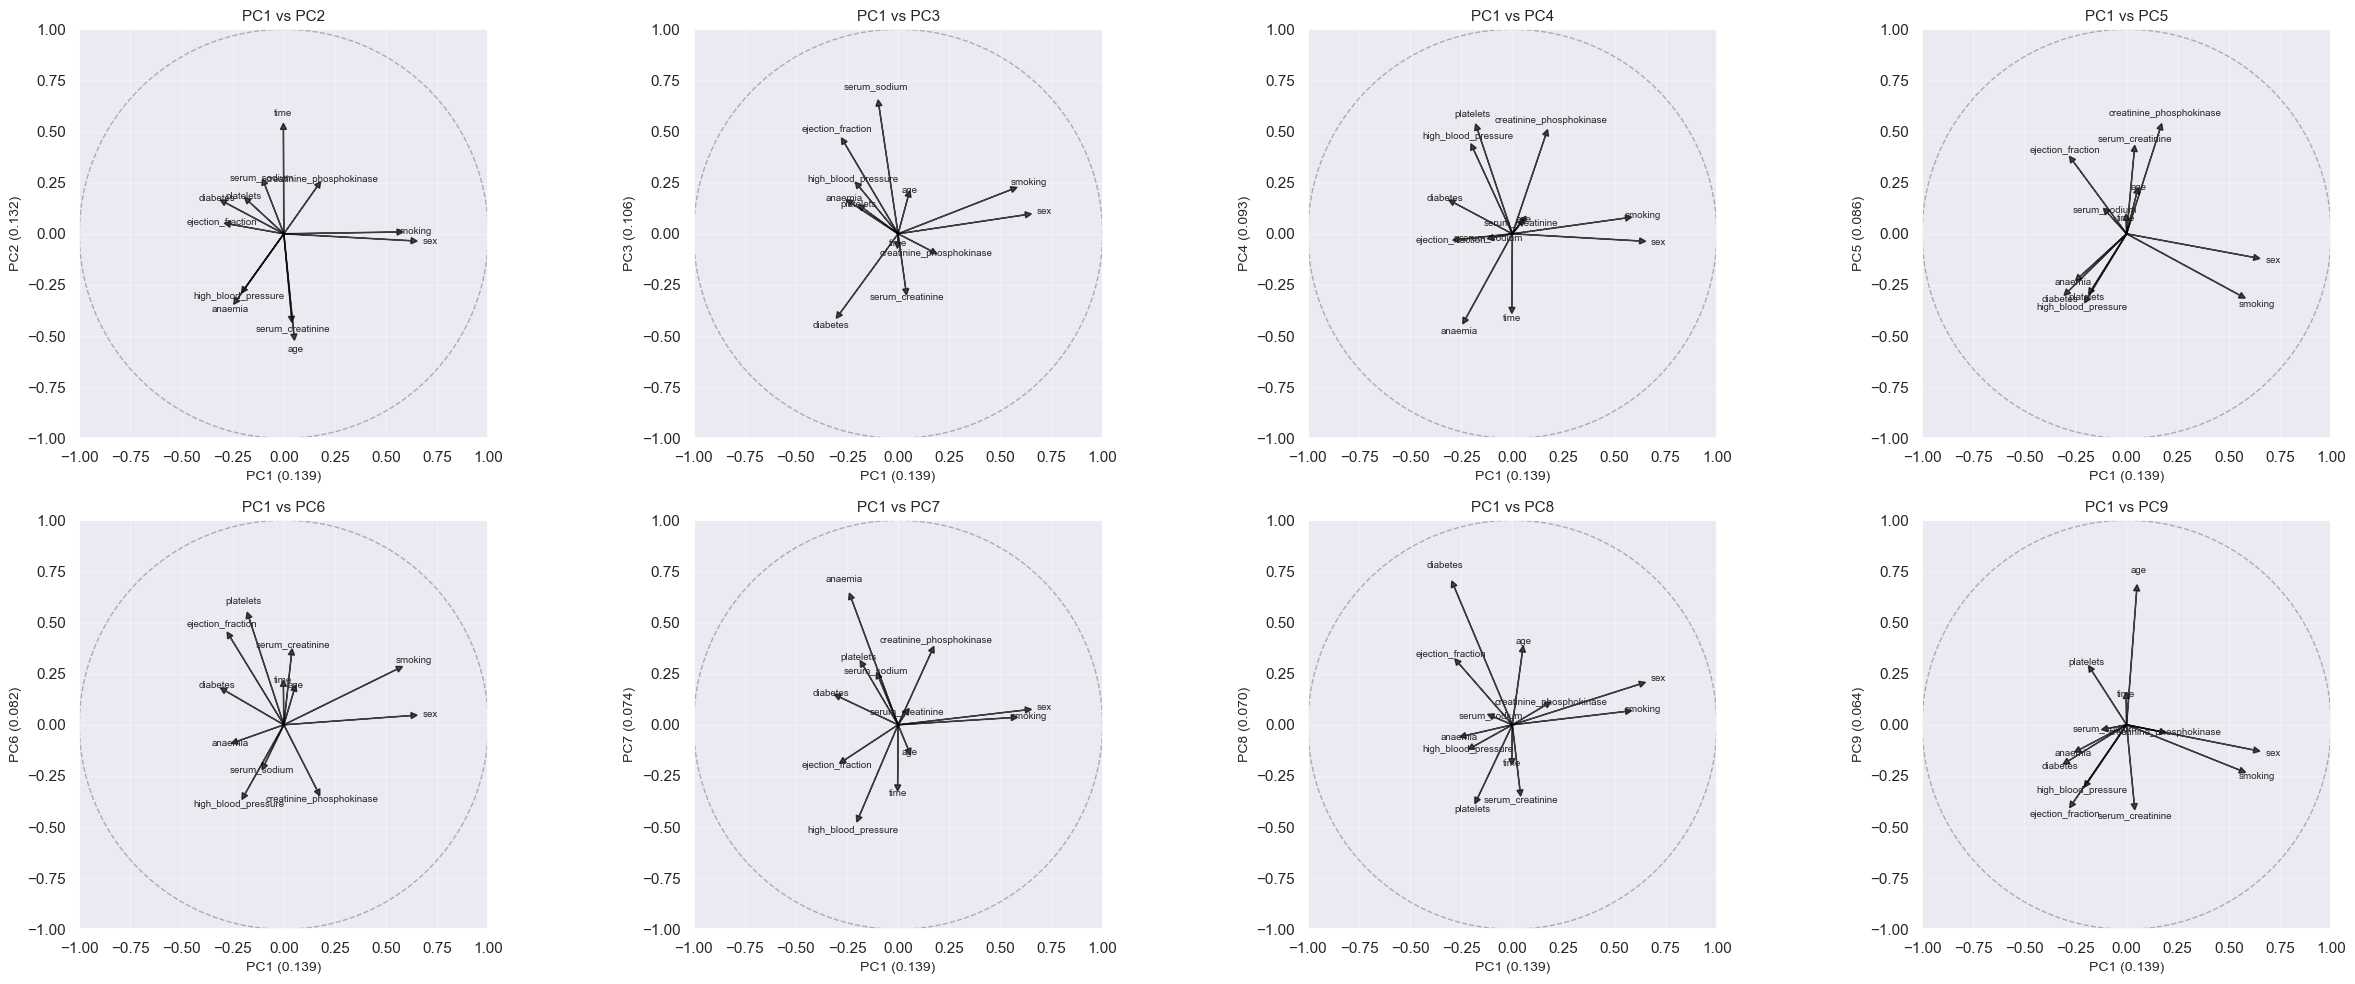

In [ ]:
# Replace your current biplot code with this:

# Create 10 subplots for different PC combinations
fig, axes = plt.subplots(2, 4, figsize=(25, 10))
axes = axes.flatten()

V = pca.components_.T  # Get loadings matrix

for i, (pc1, pc2) in enumerate(pc_combinations):
    ax = axes[i]
    
    # Plot arrows for each feature
    for attr_idx, attr_name in enumerate(X.columns):
        ax.arrow(0, 0, V[attr_idx, pc1], V[attr_idx, pc2], 
                head_width=0.03, head_length=0.03, fc='black', ec='black', alpha=0.7)
        
        # Add text labels (smaller font for readability)
        ax.text(V[attr_idx, pc1] * 1.15, V[attr_idx, pc2] * 1.15, 
               attr_name, fontsize=7, ha='center', va='center')
    
    # Set plot properties
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_xlabel(f'PC{pc1+1} ({pca.explained_variance_ratio_[pc1]:.3f})', fontsize=10)
    ax.set_ylabel(f'PC{pc2+1} ({pca.explained_variance_ratio_[pc2]:.3f})', fontsize=10)
    ax.set_title(combination_labels[i], fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    
    # Add unit circle
    circle_angles = np.arange(0, 2 * np.pi, 0.01)
    ax.plot(np.cos(circle_angles), np.sin(circle_angles), 'k--', alpha=0.3, linewidth=1)

plt.tight_layout()
plt.show()

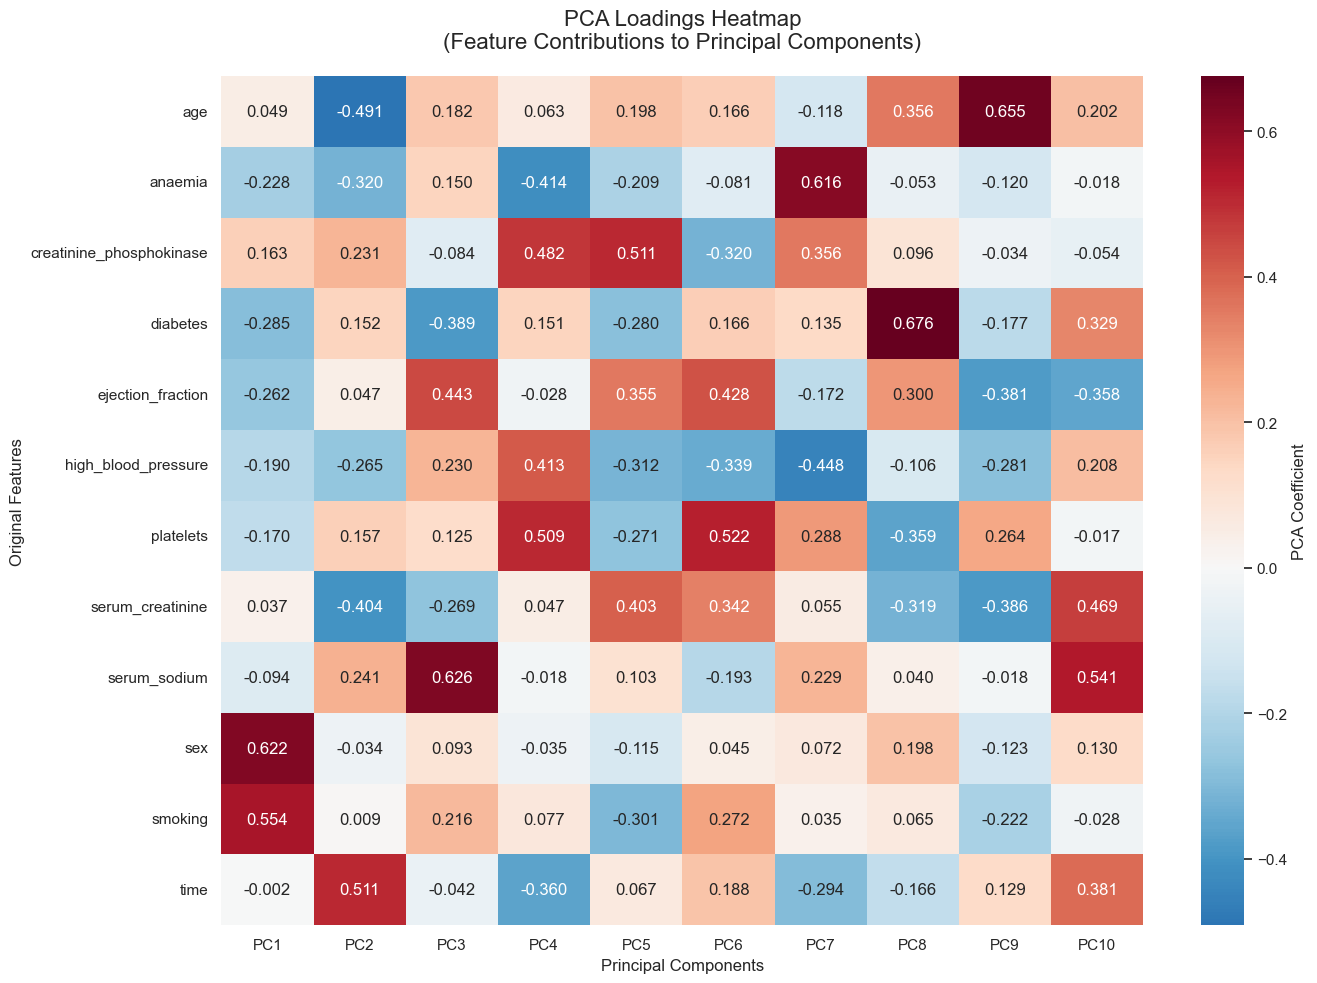

In [71]:
# Create heatmap of PCA coefficients (loadings)
plt.figure(figsize=(14, 10))

# Get the loadings matrix (features x components)
V = pca.components_.T  # Shape: (n_features, n_components)
pca_to_consider = 10

# Create heatmap
sns.heatmap(V[:, :pca_to_consider],
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.3f',
            xticklabels=[f'PC{i+1}' for i in range(pca_to_consider)],
            yticklabels=X.columns,
            cbar_kws={'label': 'PCA Coefficient'})

plt.title('PCA Loadings Heatmap\n(Feature Contributions to Principal Components)', fontsize=16, pad=20)
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Original Features', fontsize=12)
plt.tight_layout()
plt.show()

### 4.2 Variance Explained
Let's analyze how much variance is explained by each component and determine the optimal number of components.

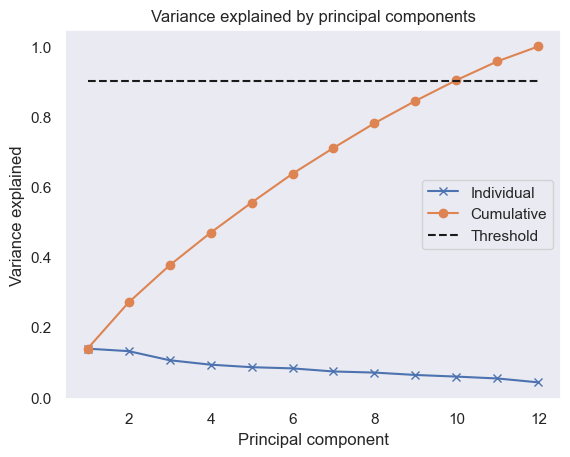

In [75]:
V = pca.components_.T
# Compute fraction of variance explained
rho = pca.explained_variance_ratio_

### END SOLUTION

# 90% threshold for variance explained
threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

### 4.3 Data Projection onto Principal Components
Let's visualize the data projected onto the principal components, with color coding by the target variable (DEATH_EVENT).

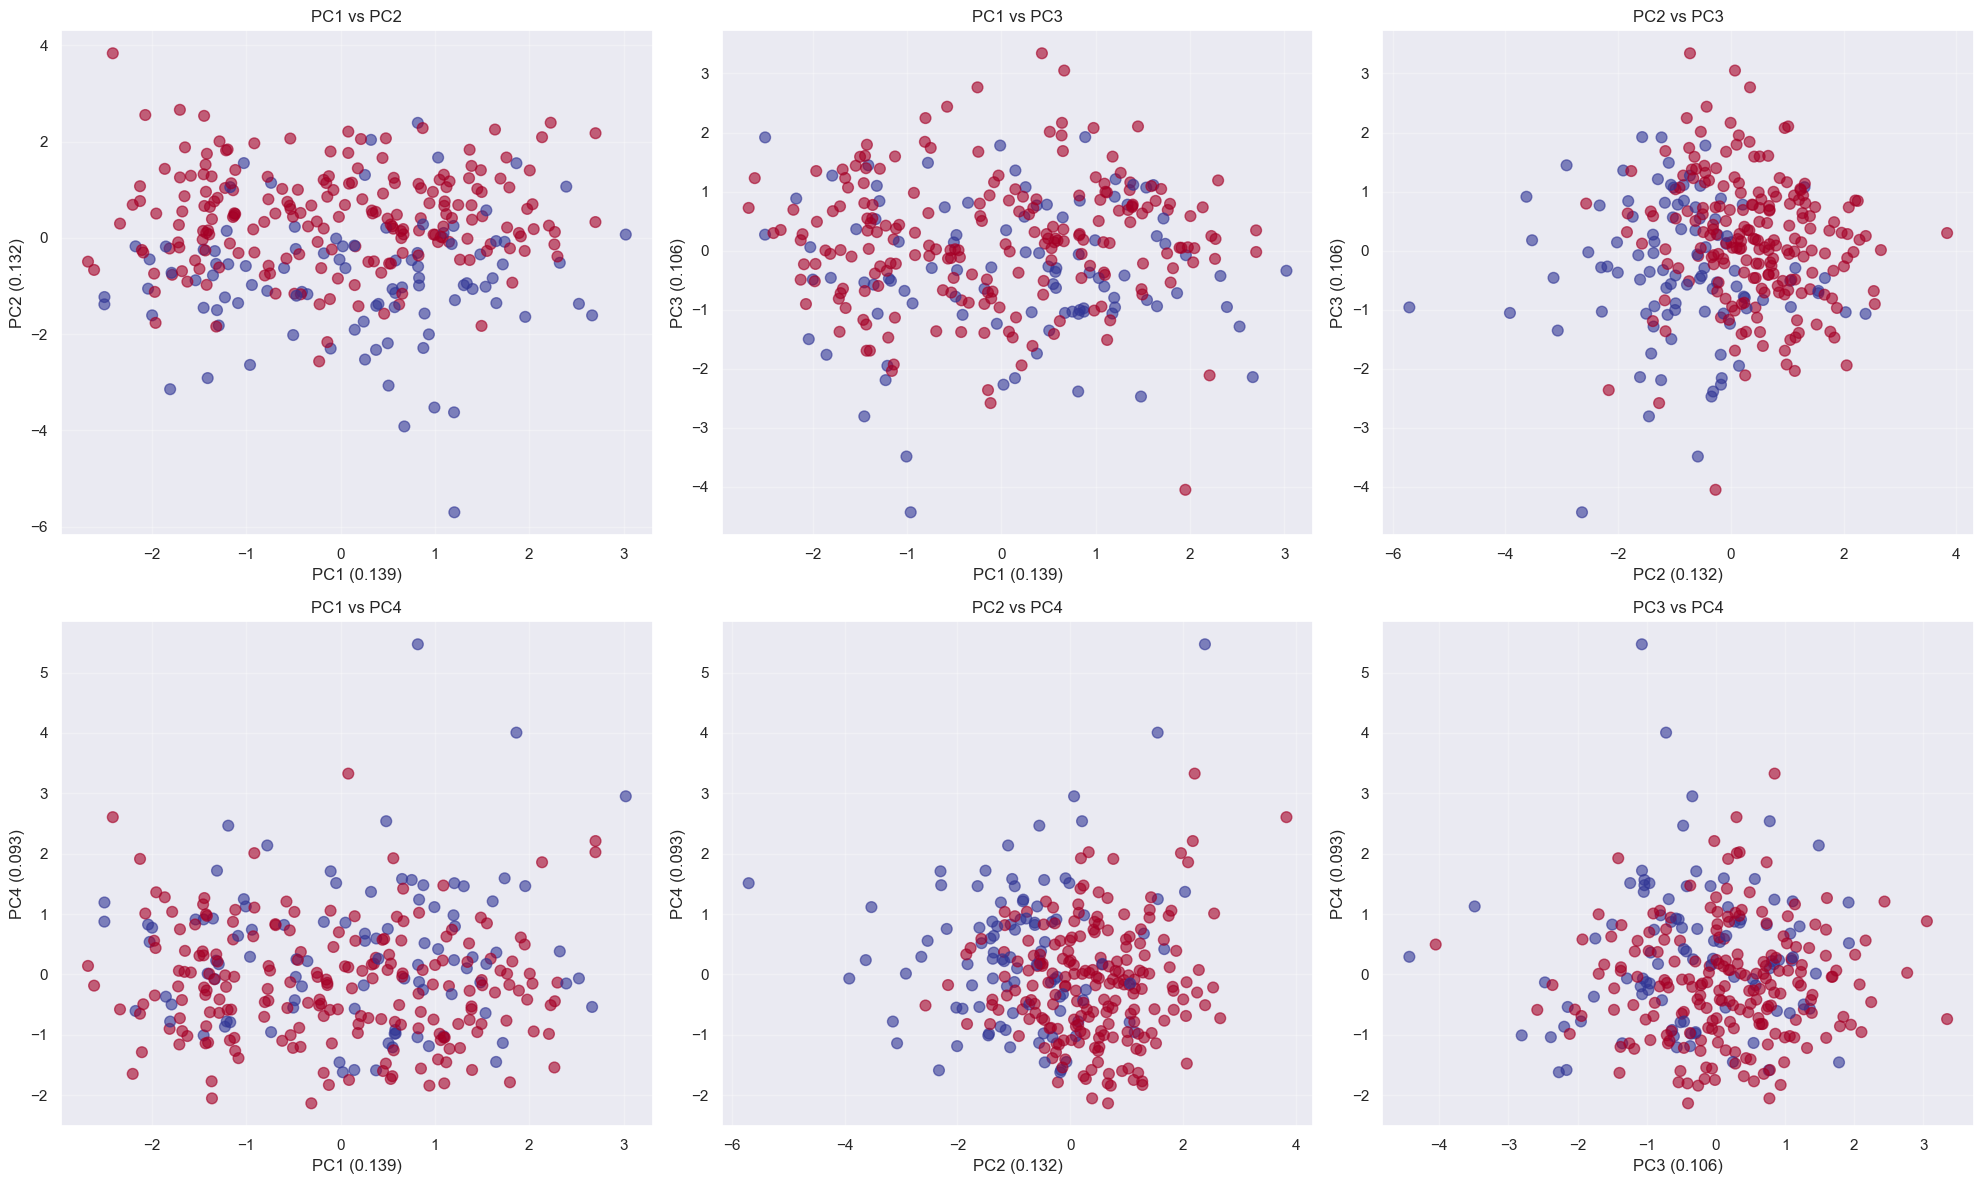

In [78]:
# Create 2D scatter plots for different PC combinations
# Convert target to numeric for coloring
target_numeric = df['DEATH_EVENT'].values

# Create multiple 2D projections
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Different PC combinations to visualize
pc_combinations = [(0, 1), (0, 2), (1, 2), (0, 3), (1, 3), (2, 3)]
combination_labels = ['PC1 vs PC2', 'PC1 vs PC3', 'PC2 vs PC3', 'PC1 vs PC4', 'PC2 vs PC4', 'PC3 vs PC4']

for i, (pc1, pc2) in enumerate(pc_combinations):
    if i < len(axes):
        # Create scatter plot
        scatter = axes[i].scatter(X_pca[:, pc1], X_pca[:, pc2], 
                                c=target_numeric, cmap='RdYlBu', alpha=0.6, s=60)
        axes[i].set_xlabel(f'PC{pc1+1} ({pca.explained_variance_ratio_[pc1]:.3f})')
        axes[i].set_ylabel(f'PC{pc2+1} ({pca.explained_variance_ratio_[pc2]:.3f})')
        axes[i].set_title(combination_labels[i])
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()